# Japan Hostel Price Prediction

### About the data
- Data Source: [Hostel World Dataset](https://www.kaggle.com/datasets/koki25ando/hostel-world-dataset)
- The data was scraped by the Kaggle contributor during 2018.
- The dataset consists of 16 columns and 342 rows.

##### Dataset Information
- hostel.name: Hostel Name
- City: City name where the hostel is located
- price.from: Minimum Price for a 1-night stay
- Distance: Distance from the city center (km)
- summary.score: Summary score of ratings
- rating.band: Rating band
- atmosphere: Rating score of atmosphere
- cleanliness: Rating score of cleanliness
- facilities: Rating score of facilities
- location.y: Rating score of location
- security: Rating score of security
- staff: Rating score of staff
- valueformoney: Rating score of value for money
- lon: Longitude
- lat: Latitude

### The problem
In recent years, the popularity of hostels as an accommodation option for travelers in Japan has surged due to their affordability and unique cultural experiences. However, determining the price per night for these hostels can be challenging, as it depends on various factors such as location, facilities, seasonality, and local events. This unpredictability makes it difficult for both travelers and hostel operators to set and estimate competitive prices.
### The goal
Our main goal is to create a regression model that can predict a hostel's price per night based on its features. Also, data analysis will be performed in order to find out hidden insights about the Japanese hostels.

### Objectives
- Explore and understand the dataset.
- Gain insights into the japanese hostels features and their prices.
- Evaluate various regression algorithms and select the most promising.
- Fine-tune their hyperparameters to optimize performance.

### Import data and packages

In [57]:
# Kaggle API
from kaggle.api.kaggle_api_extended import KaggleApi

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso

from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_absolute_error, make_scorer
from sklearn.model_selection import cross_validate

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

from sklearn.metrics import r2_score, mean_absolute_error

In [2]:
# Connect to Kaggle API
api = KaggleApi()
api.authenticate()

# Download the dataset
api.dataset_download_files(
    dataset='koki25ando/hostel-world-dataset',
    path='../artifacts/data/raw/',
    unzip=True
)

In [3]:
df = pd.read_csv('../artifacts/data/raw/Hostel.csv')
df.head()

,Unnamed: 0,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
0,1,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,2,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
2,3,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,4,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,5,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898


In [4]:
df.shape

(342, 16)

### Data Exploration

In [5]:
# Missing values
df.isna().sum()

Unnamed: 0        0
hostel.name       0
City              0
price.from        0
Distance          0
summary.score    15
rating.band      15
atmosphere       15
cleanliness      15
facilities       15
location.y       15
security         15
staff            15
valueformoney    15
lon              44
lat              44
dtype: int64

In [6]:
# Duplicates
df.duplicated().sum()

0

In [7]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     342 non-null    int64  
 1   hostel.name    342 non-null    object 
 2   City           342 non-null    object 
 3   price.from     342 non-null    int64  
 4   Distance       342 non-null    object 
 5   summary.score  327 non-null    float64
 6   rating.band    327 non-null    object 
 7   atmosphere     327 non-null    float64
 8   cleanliness    327 non-null    float64
 9   facilities     327 non-null    float64
 10  location.y     327 non-null    float64
 11  security       327 non-null    float64
 12  staff          327 non-null    float64
 13  valueformoney  327 non-null    float64
 14  lon            298 non-null    float64
 15  lat            298 non-null    float64
dtypes: float64(10), int64(2), object(4)
memory usage: 42.9+ KB


In [8]:
# Number of unique values
df.nunique()

Unnamed: 0       342
hostel.name      342
City               5
price.from        42
Distance         119
summary.score     44
rating.band        5
atmosphere        42
cleanliness       38
facilities        40
location.y        36
security          38
staff             30
valueformoney     35
lon              296
lat              296
dtype: int64

In [9]:
# Statistics for numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,342.0,171.500000,98.871128,1.000000,86.250000,171.500000,256.750000,3.420000e+02
price.from,342.0,8388.011696,76415.272323,1000.000000,2000.000000,2500.000000,2900.000000,1.003200e+06
summary.score,327.0,8.782569,0.960909,3.100000,8.600000,9.000000,9.400000,1.000000e+01
atmosphere,327.0,8.238838,1.382002,2.000000,7.800000,8.600000,9.000000,1.000000e+01
cleanliness,327.0,9.011927,1.215775,2.000000,8.800000,9.300000,9.800000,1.000000e+01
facilities,327.0,8.597554,1.285356,2.000000,8.000000,9.000000,9.300000,1.000000e+01
location.y,327.0,8.694801,1.102703,2.000000,8.000000,9.000000,9.400000,1.000000e+01
security,327.0,8.947401,1.114345,2.000000,8.700000,9.200000,9.600000,1.000000e+01
staff,327.0,9.133333,1.086513,2.000000,9.000000,9.400000,9.800000,1.000000e+01
valueformoney,327.0,8.848318,1.047809,4.000000,8.600000,9.000000,9.500000,1.000000e+01


In [10]:
# Categories present in categorical features
object_columns = df.select_dtypes(include='object').columns

# Print unique values for the categorical features
for column in object_columns:
    if df[column].nunique()<10:
        print(f"Unique values for {column}:")
        print(df[column].unique())
        print("\n")

Unique values for City:
['Osaka' 'Fukuoka-City' 'Tokyo' 'Hiroshima' 'Kyoto']


Unique values for rating.band:
['Superb' 'Fabulous' 'Very Good' nan 'Rating' 'Good']




##### Observations
- There are some missing values
- Price.from probably has some outliers (Mean >> Median)
- Unnamed: 0, can be removed (it is index)
- hostel.name, lon, lat can be removed (not relevant for this project)
- Distance should be converted to numerical

### Data cleaning

In [11]:
interim_df = df.copy()

In [12]:
# Remove irrelevant features
remove_features = ['Unnamed: 0', 'hostel.name', 'lon', 'lat']
interim_df.drop(remove_features, axis=1, inplace=True)

In [13]:
interim_df.shape

(342, 12)

In [14]:
# Drop the rows with no data
# Or we could impute after splitting the data to train, test
interim_df.dropna(inplace=True)

In [15]:
interim_df.isna().sum()

City             0
price.from       0
Distance         0
summary.score    0
rating.band      0
atmosphere       0
cleanliness      0
facilities       0
location.y       0
security         0
staff            0
valueformoney    0
dtype: int64

In [16]:
# Make distance a numerical feature
interim_df['Distance'].head()

0     2.9km from city centre
1     0.7km from city centre
2     7.8km from city centre
3     8.7km from city centre
4    10.5km from city centre
Name: Distance, dtype: object

In [17]:
# Capture the number in the string
interim_df['distance_km'] = interim_df['Distance'].str.extract('(\d+(\.\d+)?)').astype(float)[0]
interim_df['distance_km'].head()

0     2.9
1     0.7
2     7.8
3     8.7
4    10.5
Name: distance_km, dtype: float64

In [18]:
interim_df['distance_km'].isna().sum()

0

In [19]:
interim_df['distance_km'].describe().T

count    327.000000
mean       5.770642
std        4.609639
min        0.000000
25%        2.350000
50%        4.500000
75%        8.500000
max       36.600000
Name: distance_km, dtype: float64

In [20]:
interim_df.drop(['Distance'], axis=1, inplace=True)

In [21]:
# Remove extreme outliers
def return_extreme_outliers(data,feature):
    # Calculate the IQR
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds 
    #(4.5 in order to detect outliers significantly far from the median )
    lower_bound = Q1 - 4.5 * IQR
    upper_bound = Q3 + 4.5 * IQR

    # Identify extreme outliers
    extreme_outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]

    # Print extreme outliers
    print("Extreme Outliers for '{feature}':")
    print(extreme_outliers[[feature]])
    return extreme_outliers[[feature]]

In [22]:
remove_lines = return_extreme_outliers(interim_df,'price.from').index
interim_df.drop(remove_lines,inplace=True)

Extreme Outliers for '{feature}':
     price.from
289     1003200
300        7600
316     1003200


In [23]:
print("Before cleaning the data:", df.shape)
print("After cleaning the data:", interim_df.shape)

Before cleaning the data: (342, 16)
After cleaning the data: (324, 12)


### Visualizations

##### Univariate analysis

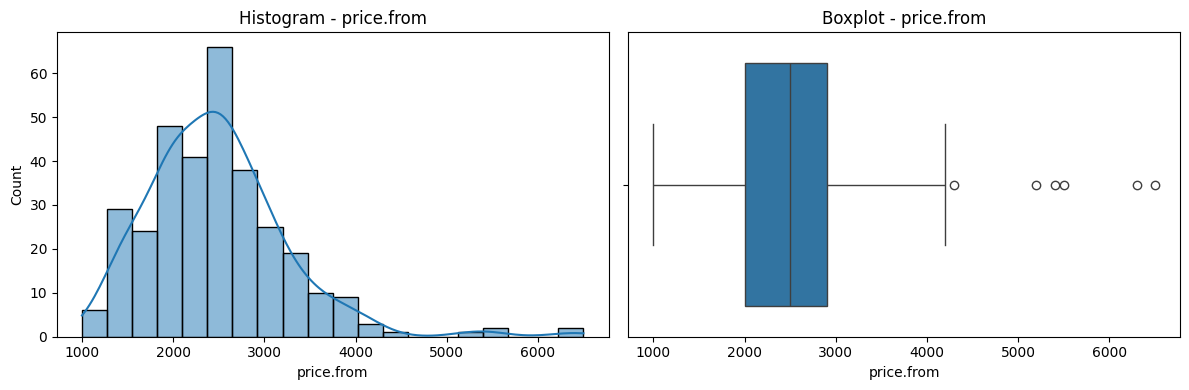

In [24]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(interim_df['price.from'], bins=20, kde=True)
plt.title('Histogram - price.from')
plt.subplot(1, 2, 2)
sns.boxplot(x=interim_df['price.from'])
plt.title('Boxplot - price.from')
plt.tight_layout()
plt.show()

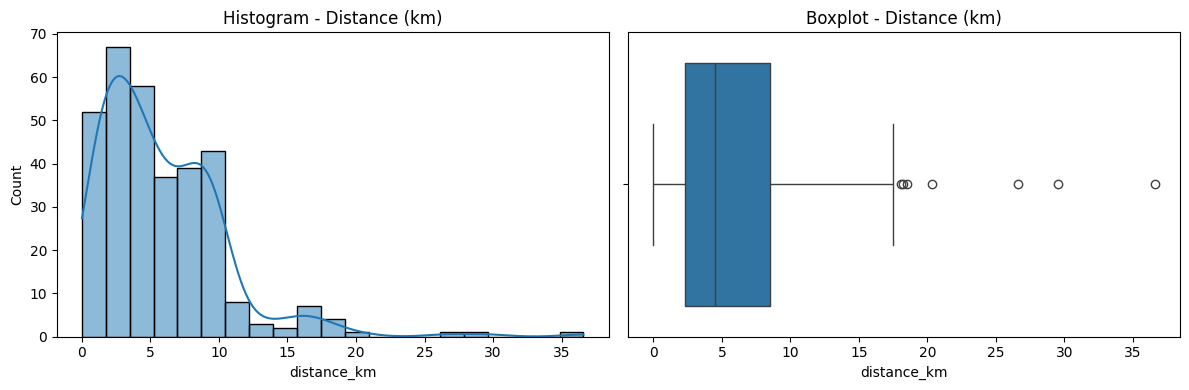

In [25]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(interim_df['distance_km'], kde=True)
plt.title('Histogram - Distance (km)')
plt.subplot(1, 2, 2)
sns.boxplot(x=interim_df['distance_km'])
plt.title('Boxplot - Distance (km)')
plt.tight_layout()
plt.show()

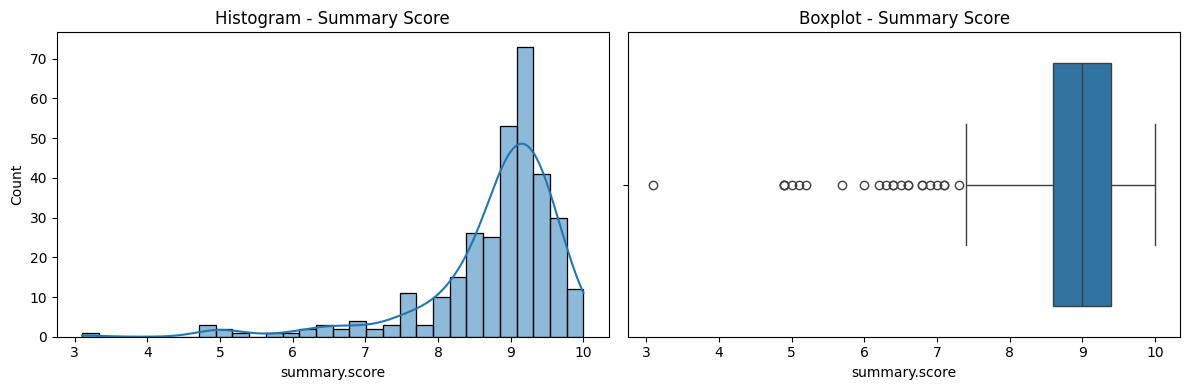

In [26]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(interim_df['summary.score'], kde=True)
plt.title('Histogram - Summary Score')
plt.subplot(1, 2, 2)
sns.boxplot(x=interim_df['summary.score'])
plt.title('Boxplot - Summary Score')
plt.tight_layout()
plt.show()

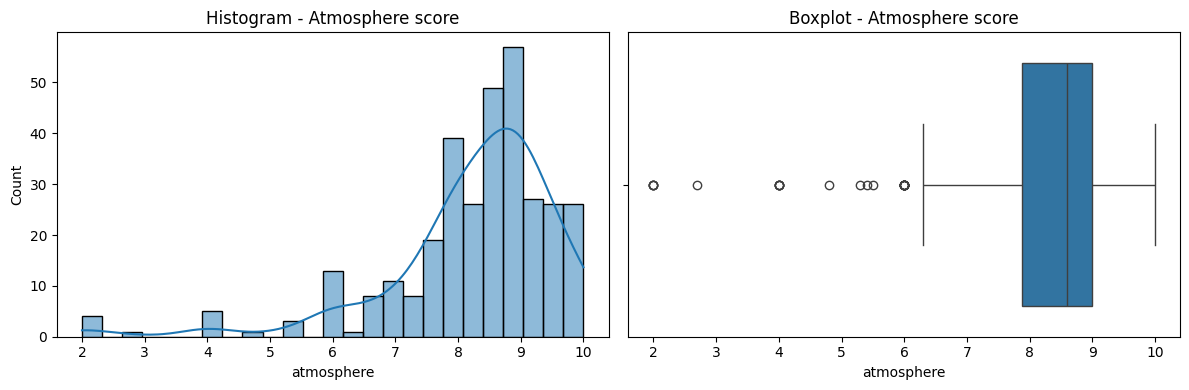

In [27]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(interim_df['atmosphere'], kde=True)
plt.title('Histogram - Atmosphere score')
plt.subplot(1, 2, 2)
sns.boxplot(x=interim_df['atmosphere'])
plt.title('Boxplot - Atmosphere score')
plt.tight_layout()
plt.show()

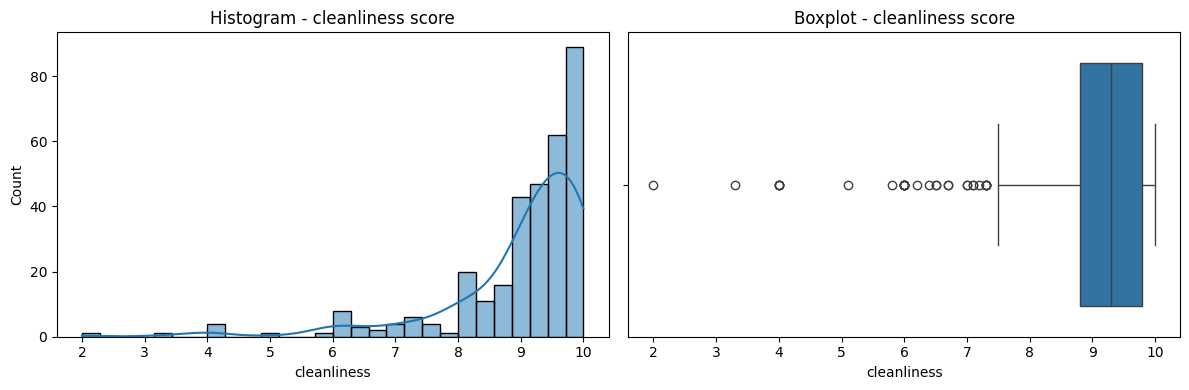

In [28]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(interim_df['cleanliness'], kde=True)
plt.title('Histogram - cleanliness score')
plt.subplot(1, 2, 2)
sns.boxplot(x=interim_df['cleanliness'])
plt.title('Boxplot - cleanliness score')
plt.tight_layout()
plt.show()

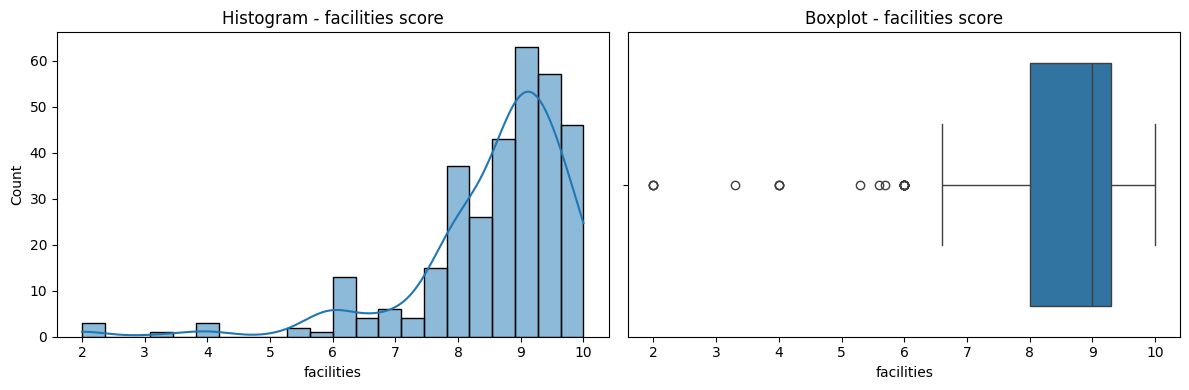

In [29]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(interim_df['facilities'], kde=True)
plt.title('Histogram - facilities score')
plt.subplot(1, 2, 2)
sns.boxplot(x=interim_df['facilities'])
plt.title('Boxplot - facilities score')
plt.tight_layout()
plt.show()

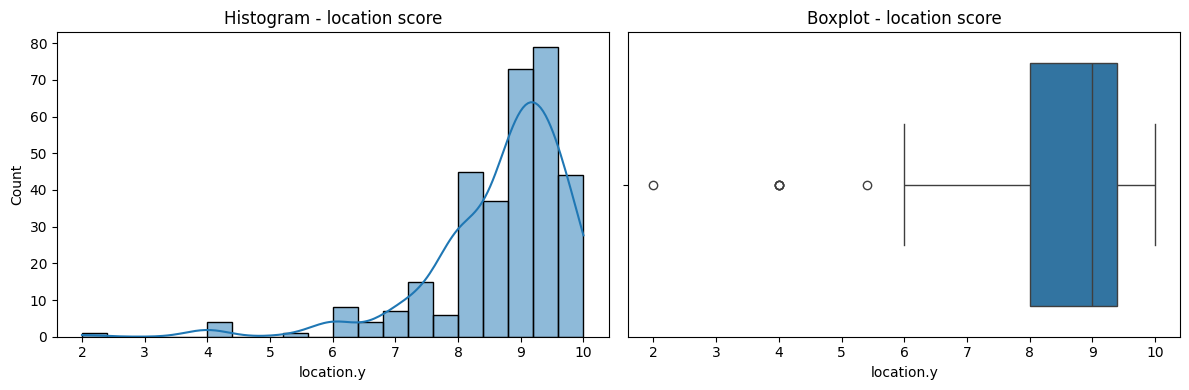

In [30]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(interim_df['location.y'], kde=True)
plt.title('Histogram - location score')
plt.subplot(1, 2, 2)
sns.boxplot(x=interim_df['location.y'])
plt.title('Boxplot - location score')
plt.tight_layout()
plt.show()

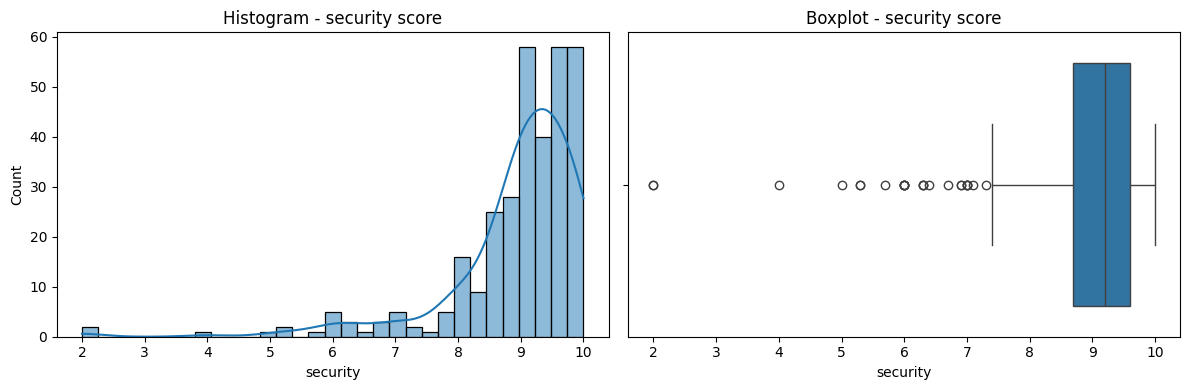

In [31]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(interim_df['security'], kde=True)
plt.title('Histogram - security score')
plt.subplot(1, 2, 2)
sns.boxplot(x=interim_df['security'])
plt.title('Boxplot - security score')
plt.tight_layout()
plt.show()

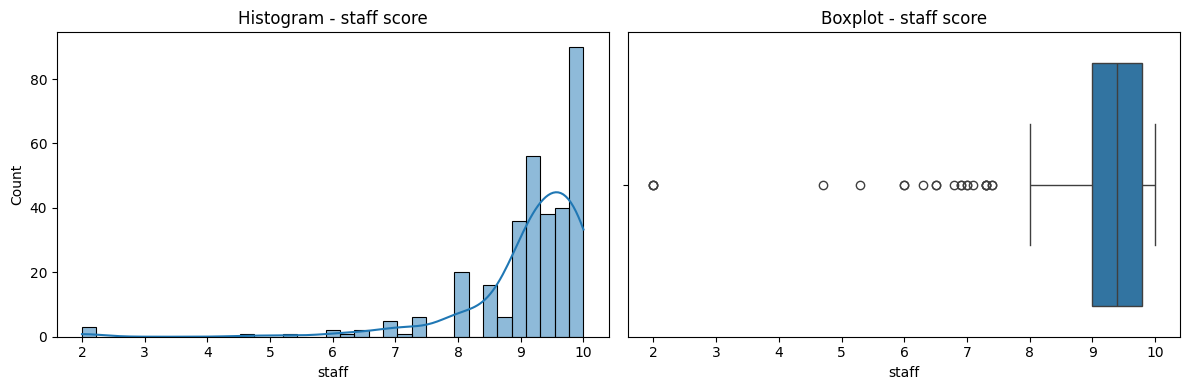

In [32]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(interim_df['staff'], kde=True)
plt.title('Histogram - staff score')
plt.subplot(1, 2, 2)
sns.boxplot(x=interim_df['staff'])
plt.title('Boxplot - staff score')
plt.tight_layout()
plt.show()

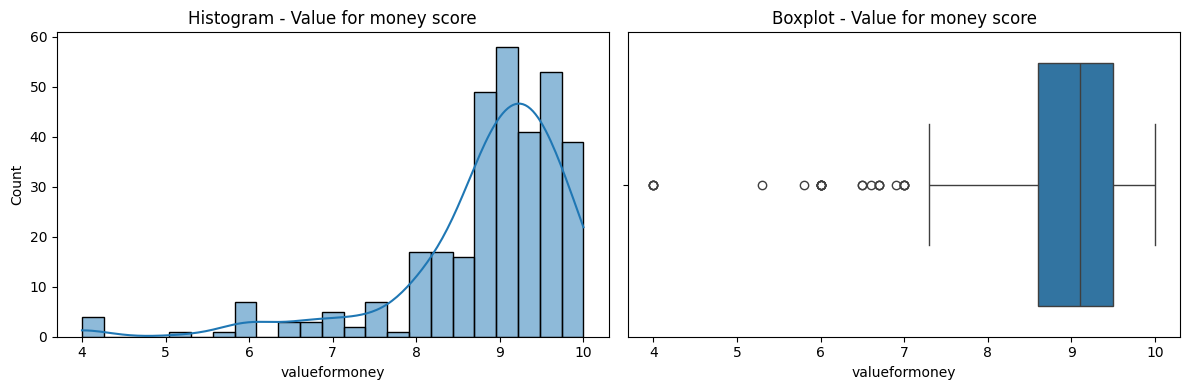

In [33]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(interim_df['valueformoney'], kde=True)
plt.title('Histogram - Value for money score')
plt.subplot(1, 2, 2)
sns.boxplot(x=interim_df['valueformoney'])
plt.title('Boxplot - Value for money score')
plt.tight_layout()
plt.show()

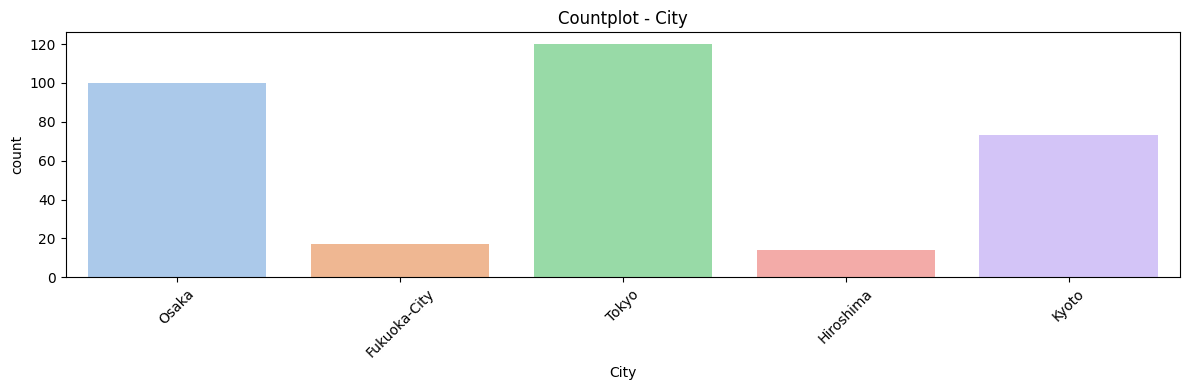

In [34]:
plt.figure(figsize=(12, 4))
sns.countplot(x='City', data=interim_df, hue='City', palette='pastel')
plt.title(f'Countplot - City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

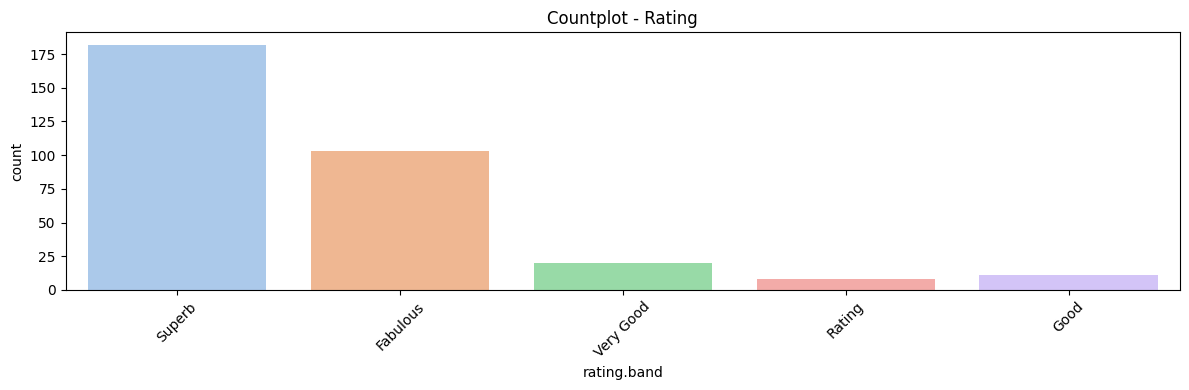

In [35]:
plt.figure(figsize=(12, 4))
sns.countplot(x='rating.band', data=interim_df, hue='rating.band', palette='pastel')
plt.title(f'Countplot - Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Observations
- The price distribution is almost normal, ranging from 1000 to 4000, with some outliers exceeding this range.
- Most distances fall within the range of 0-20 km, but there are exceptions with distances exceeding 25 km.
- Ratings are generally high, ranging from 7 to 9 out of 10.
- Tokyo, Kyoto, and Osaka are the cities with the highest concentration of hostels.
- Most hostels are described as fabulous or superb.

##### Bivariate analysis

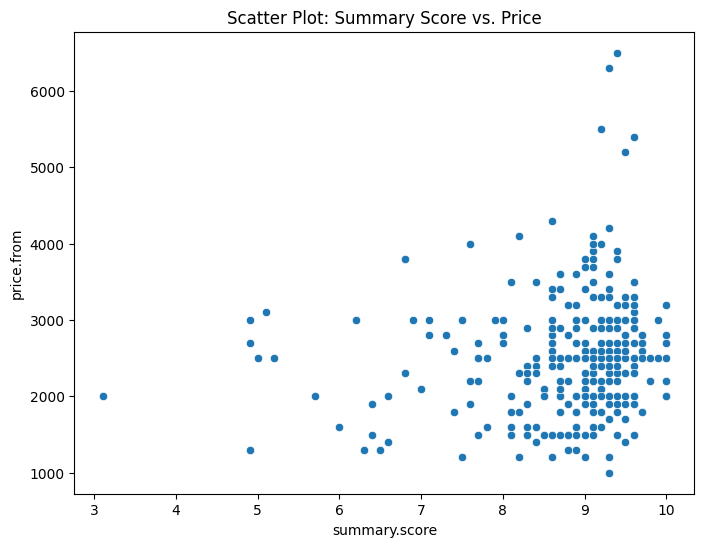

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='summary.score', y='price.from', data=interim_df)
plt.title('Scatter Plot: Summary Score vs. Price')
plt.show()

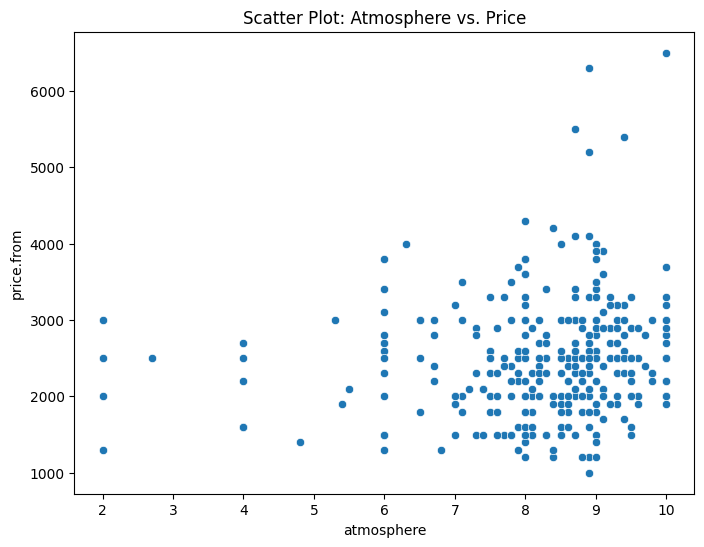

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='atmosphere', y='price.from', data=interim_df)
plt.title('Scatter Plot: Atmosphere vs. Price')
plt.show()

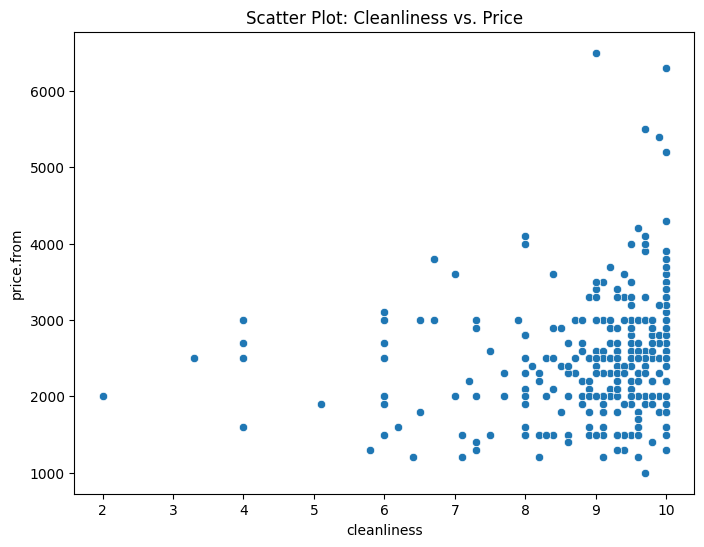

In [38]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='cleanliness', y='price.from', data=interim_df)
plt.title('Scatter Plot: Cleanliness vs. Price')
plt.show()

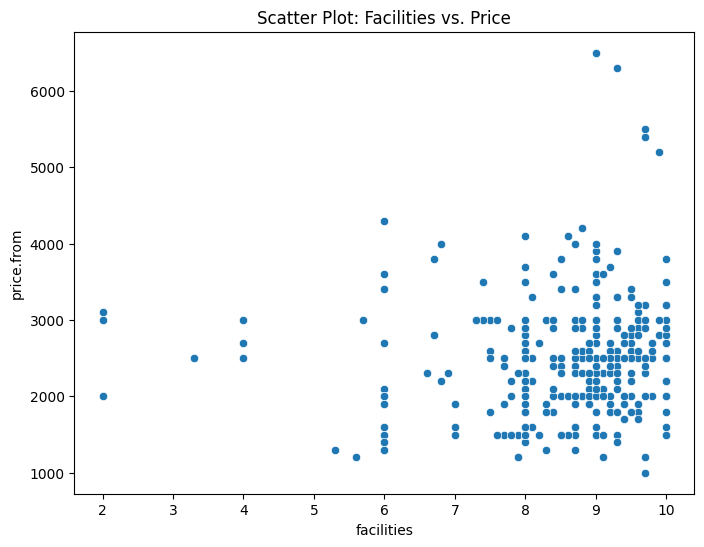

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='facilities', y='price.from', data=interim_df)
plt.title('Scatter Plot: Facilities vs. Price')
plt.show()

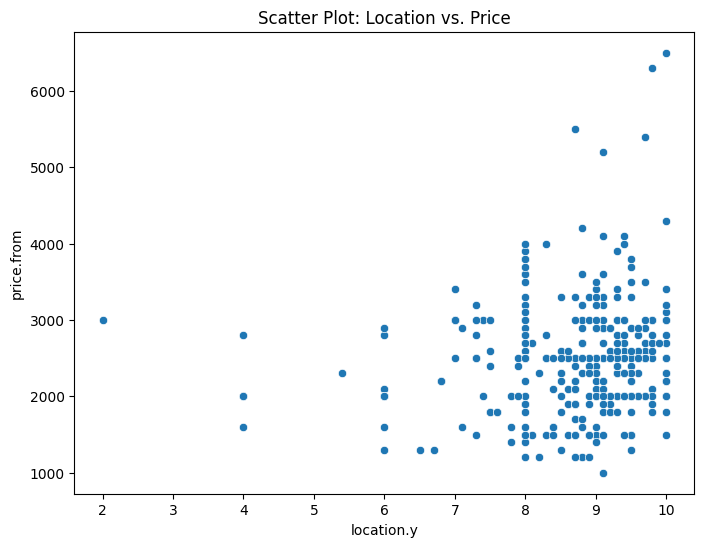

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='location.y', y='price.from', data=interim_df)
plt.title('Scatter Plot: Location vs. Price')
plt.show()

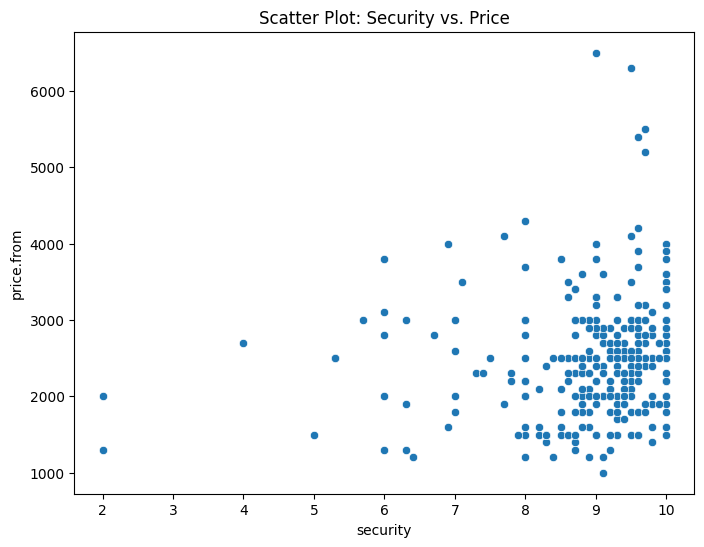

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='security', y='price.from', data=interim_df)
plt.title('Scatter Plot: Security vs. Price')
plt.show()

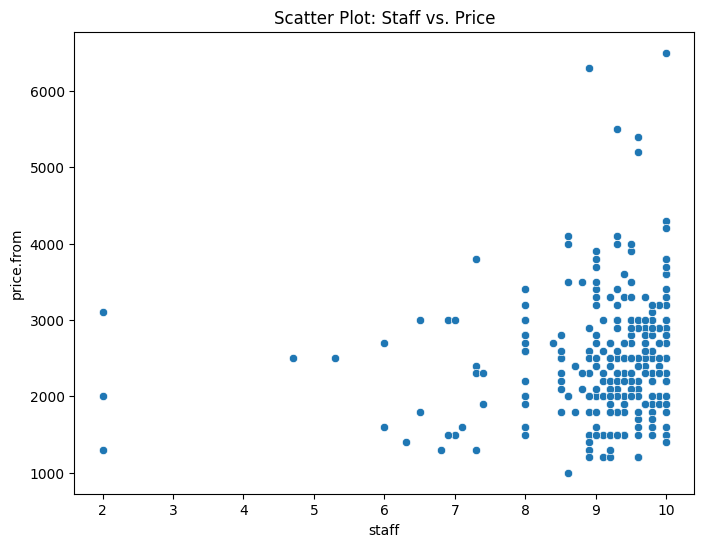

In [42]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='staff', y='price.from', data=interim_df)
plt.title('Scatter Plot: Staff vs. Price')
plt.show()

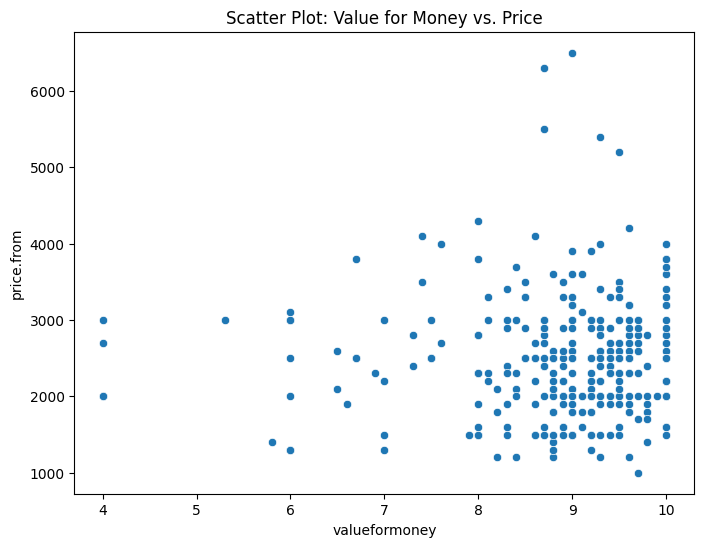

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='valueformoney', y='price.from', data=interim_df)
plt.title('Scatter Plot: Value for Money vs. Price')
plt.show()

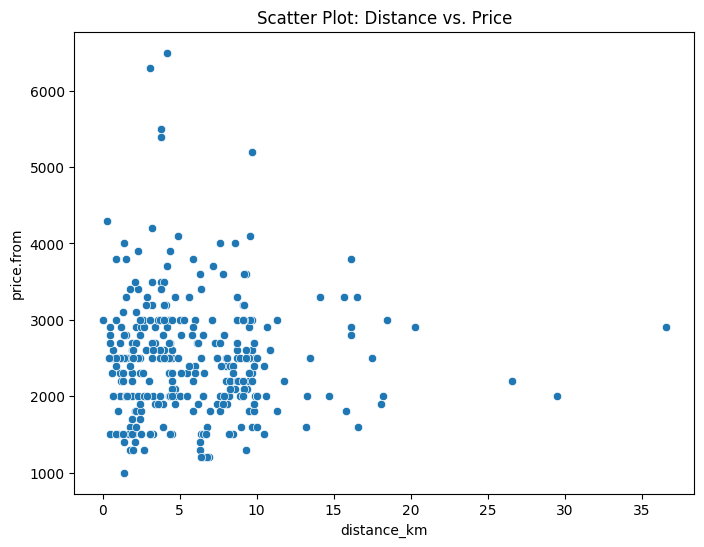

In [44]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='distance_km', y='price.from', data=interim_df)
plt.title('Scatter Plot: Distance vs. Price')
plt.show()

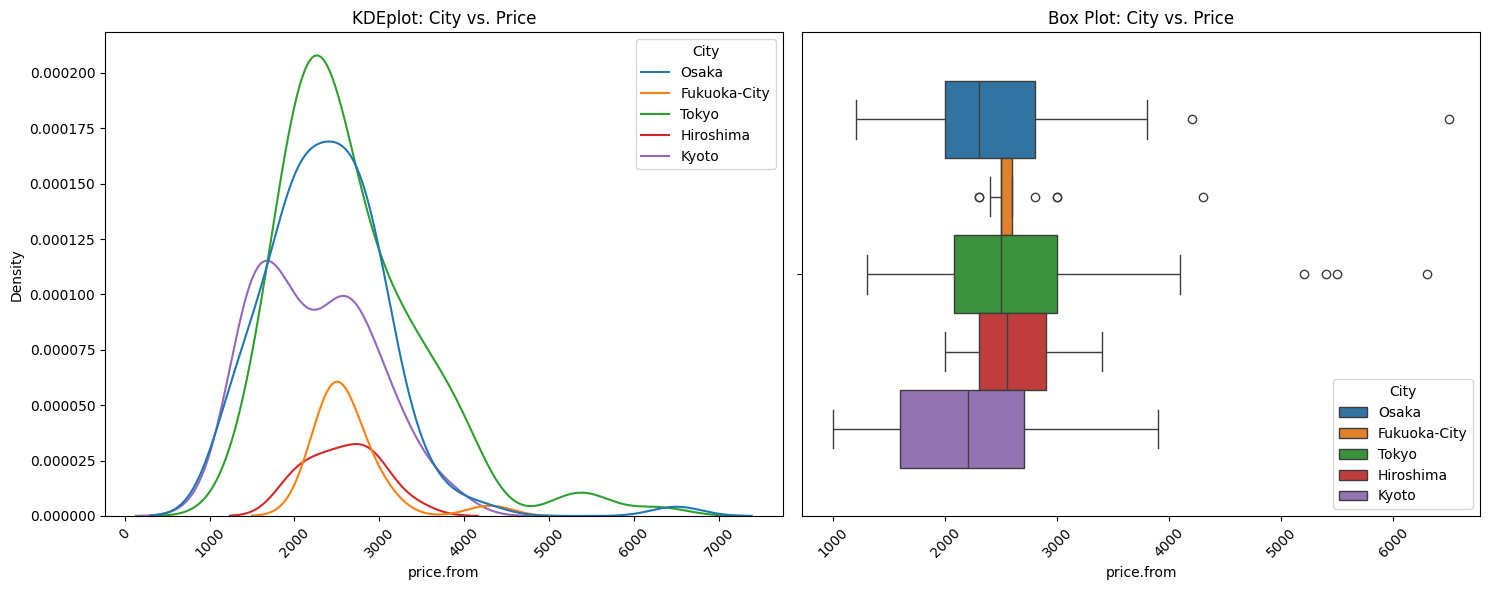

In [45]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(data=interim_df, hue='City', x='price.from')
plt.title('KDEplot: City vs. Price')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=interim_df, x='price.from', hue='City')
plt.title('Box Plot: City vs. Price')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

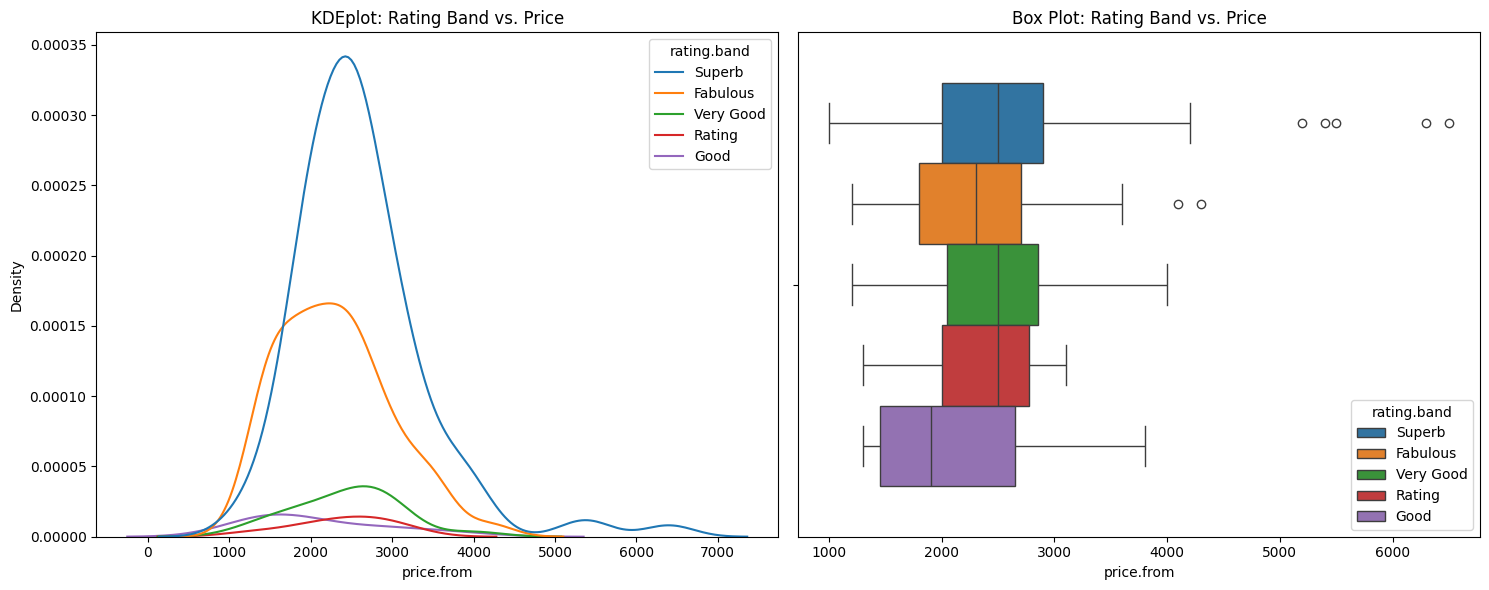

In [46]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(data=interim_df, hue='rating.band', x='price.from')
plt.title('KDEplot: Rating Band vs. Price')

plt.subplot(1, 2, 2)
sns.boxplot(data=interim_df, x='price.from', hue='rating.band')
plt.title('Box Plot: Rating Band vs. Price')

plt.tight_layout()
plt.show()

##### Observations
- Hostels with higher prices seem to have good features, such as high ratings, low distance, and high value for money.
- Prices for hostels in Kyoto are distributed at a lower range.
- Hostels rated as 'good' tend to have a lower price distribution.

##### Multivariate analysis 

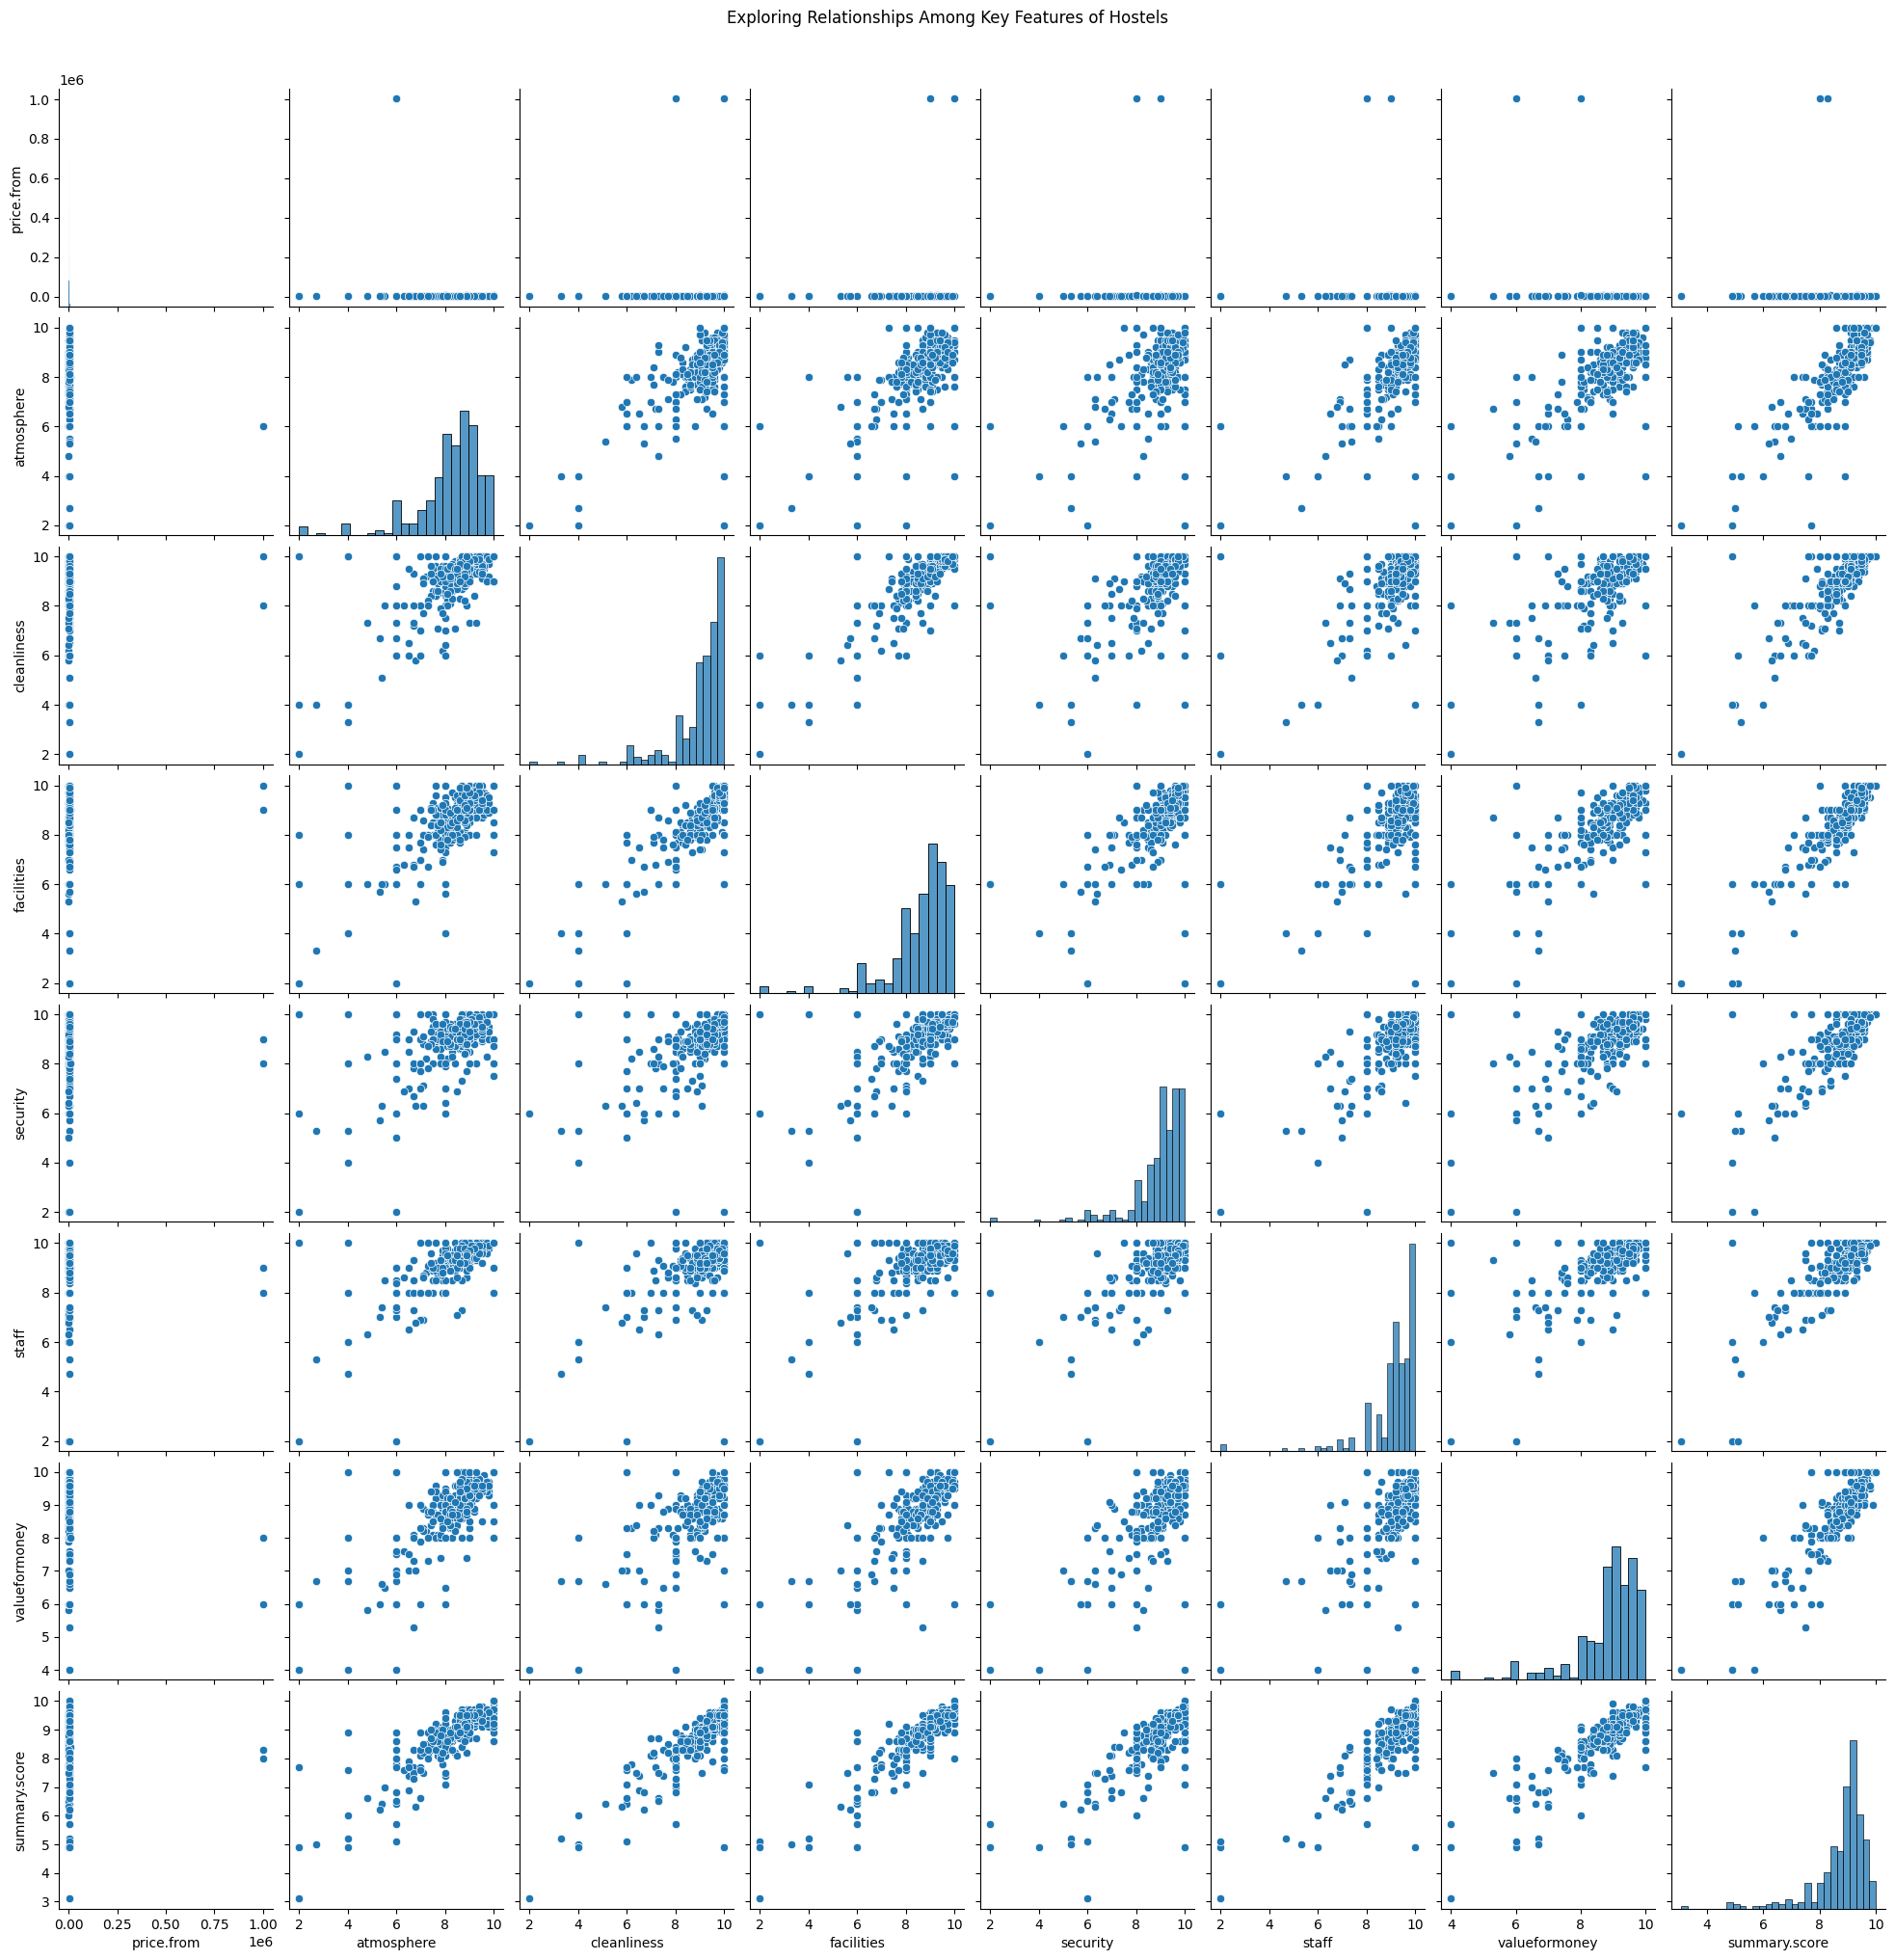

In [47]:
selected_features = ['price.from', 'atmosphere', 'cleanliness', 'facilities', 'security', 'staff', 'valueformoney', 'summary.score']
sns.pairplot(df[selected_features])
plt.suptitle('Exploring Relationships Among Key Features of Hostels', y=1.02)
plt.show()

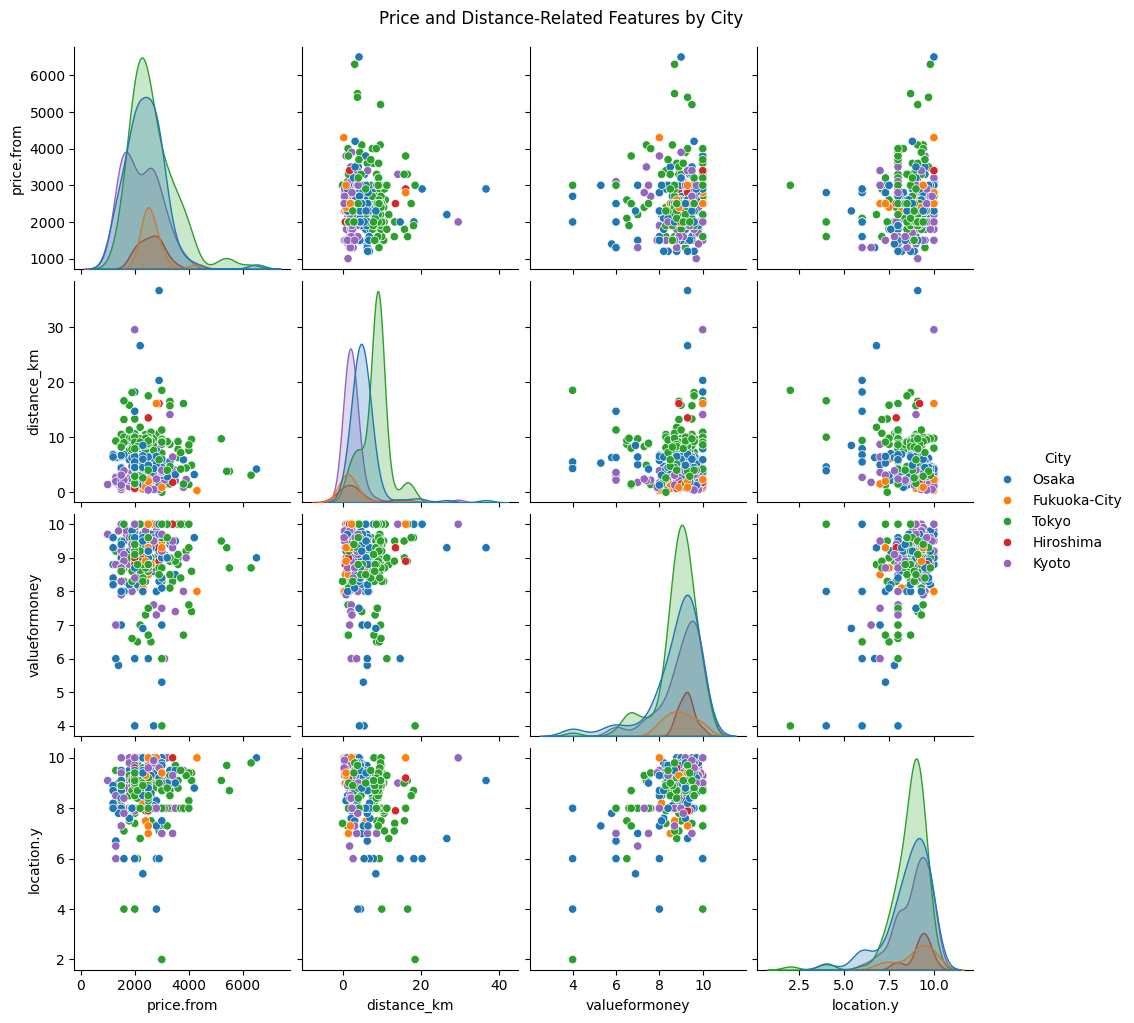

In [49]:
#hue:City, features: price.from, distance_km, valueformoney, location.y
selected_features = ['price.from', 'distance_km', 'valueformoney', 'location.y', 'City']
sns.pairplot(interim_df[selected_features], hue='City')
plt.suptitle('Price and Distance-Related Features by City', y=1.02)
plt.show()

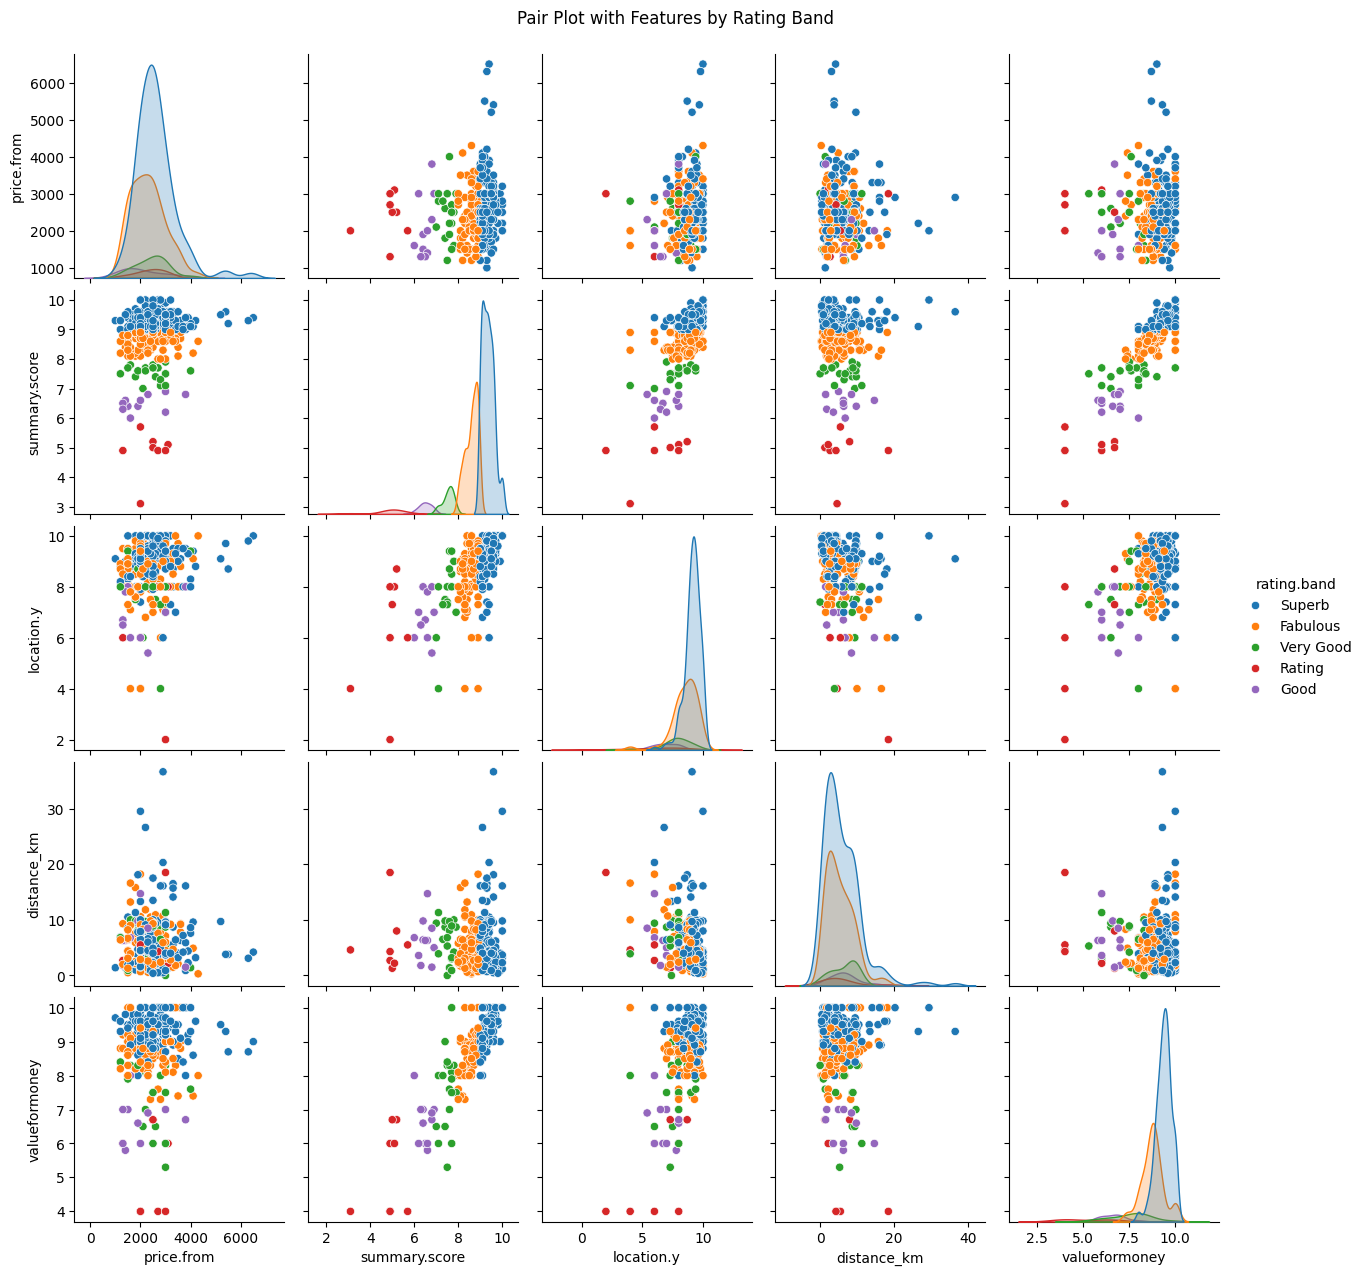

In [50]:
#hue: rating.band, features: price.from, summary.score, location.y, distance_km, valueformoney
selected_features = ['price.from', 'summary.score', 'location.y', 'distance_km', 'valueformoney', 'rating.band']
sns.pairplot(interim_df[selected_features], hue='rating.band')
plt.suptitle('Pair Plot with Features by Rating Band', y=1.02)
plt.show()

##### Observations
- Features of a hostel appear to have a positive correlation with each other.
- Tokyo exhibits the largest distances. However, the value for money and location scores are slightly lower.
- Hostels considered as superb tend to have high scores in value for money, location, and overall summary. Additionally, they tend to have lower distances.

##### Heatmap 

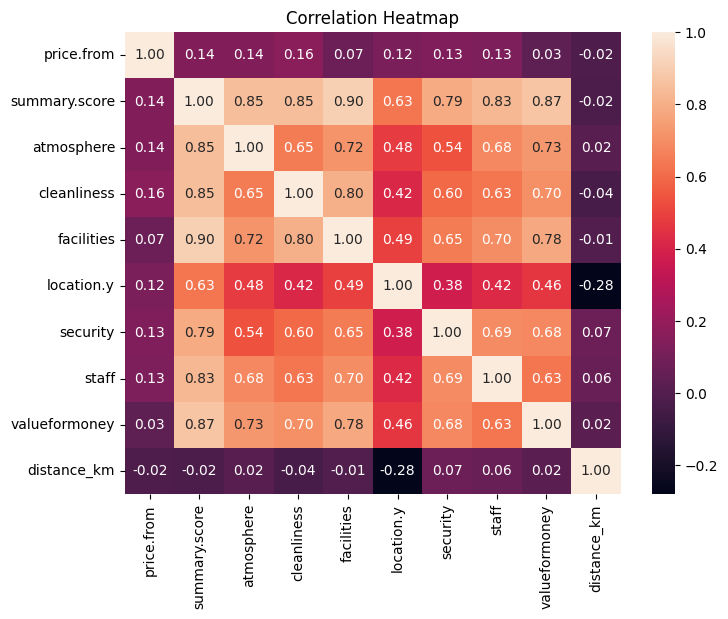

In [52]:
numerical_df = interim_df.select_dtypes(include='number')
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='rocket', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

##### Observations
- location.y and distance_km have a negative correlation (-0.28).
- price.from has the lowest correlation with value for money (0.03) and distance_km (-0.03).
- summary.score has the highest correlation with facilities (0.9) and is next highest with value for money (0.87).


##### Some significant insights
- Prices for hostels generally range from 1000 to 4000, with some outliers. Higher-priced hostels tend to have good features such as high ratings and low distances.
- Tokyo, Kyoto, and Osaka have the highest concentration of hostels, but Kyoto has lower prices.
- Most distances from hostels fall within 0-20 km, with some exceptions that exceed 25 km. On average, Tokyo has larger distances.
- Hostels features seem to have good correlations, indicating that each hostel takes care of all its features. Additionally, when the bigger the distance the lower the location score.

### Feature engineering

In [54]:
processed_df = interim_df.copy()

In [55]:
# Numerical features
num_features = processed_df.select_dtypes(exclude="object").columns
num_features.to_list()

['price.from',
 'summary.score',
 'atmosphere',
 'cleanliness',
 'facilities',
 'location.y',
 'security',
 'staff',
 'valueformoney',
 'distance_km']

In [58]:
# Standard scaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(processed_df[num_features])

In [59]:
ss_df = pd.DataFrame(scaled_data, columns=num_features)
ss_df.head()

,price.from,summary.score,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,distance_km
0,1.071032,0.428515,0.470287,0.318790,0.551286,0.182734,0.042064,0.241130,0.518559,-0.624600
1,0.160916,0.740278,0.833946,0.565300,0.706740,0.906966,0.221392,0.516870,0.615008,-1.100765
2,1.461082,-0.091091,-0.184299,-1.653293,0.318105,-0.632027,0.938701,0.792610,0.132765,0.435951
3,0.160916,-1.442067,-0.184299,-1.242442,-0.847800,-1.084672,-1.751208,-1.045655,-2.278446,0.630745
4,-1.269267,0.636357,0.906678,0.400960,0.318105,0.273263,0.490383,0.792610,0.615008,1.020335


In [60]:
# Robust Scaler
scaler = RobustScaler()
scaled_data = scaler.fit_transform(processed_df[num_features])

In [61]:
rs_df = pd.DataFrame(scaled_data, columns=num_features)
rs_df.head()

,price.from,summary.score,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,distance_km
0,0.888889,0.250,0.266667,0.1,0.230769,-0.071429,-0.222222,0.000,0.333333,-0.258065
1,0.111111,0.625,0.711111,0.4,0.384615,0.500000,0.000000,0.375,0.444444,-0.612903
2,1.222222,-0.375,-0.533333,-2.3,0.000000,-0.714286,0.888889,0.750,-0.111111,0.532258
3,0.111111,-2.000,-0.533333,-1.8,-1.153846,-1.071429,-2.444444,-1.750,-2.888889,0.677419
4,-1.111111,0.500,0.800000,0.2,0.000000,0.000000,0.333333,0.750,0.444444,0.967742


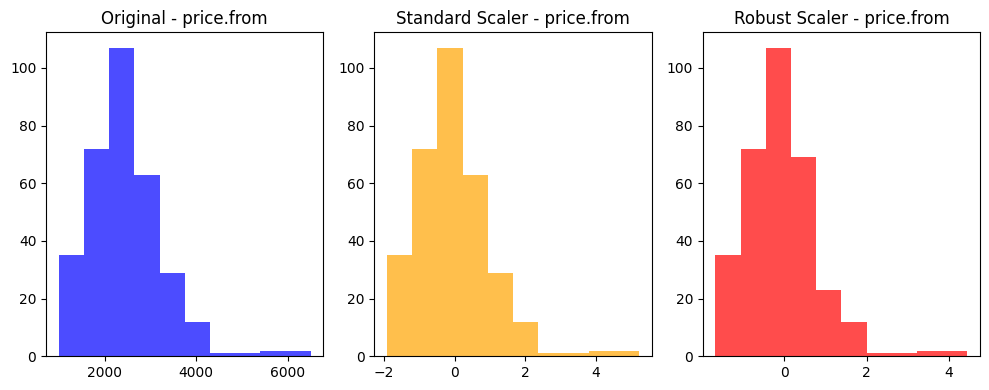

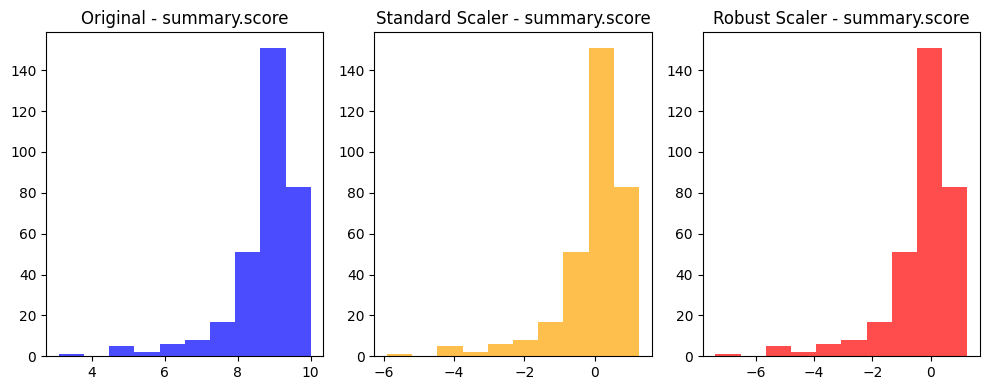

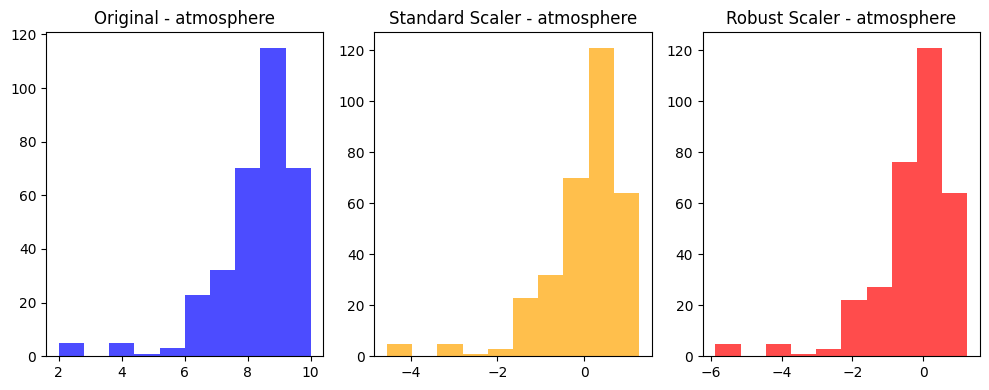

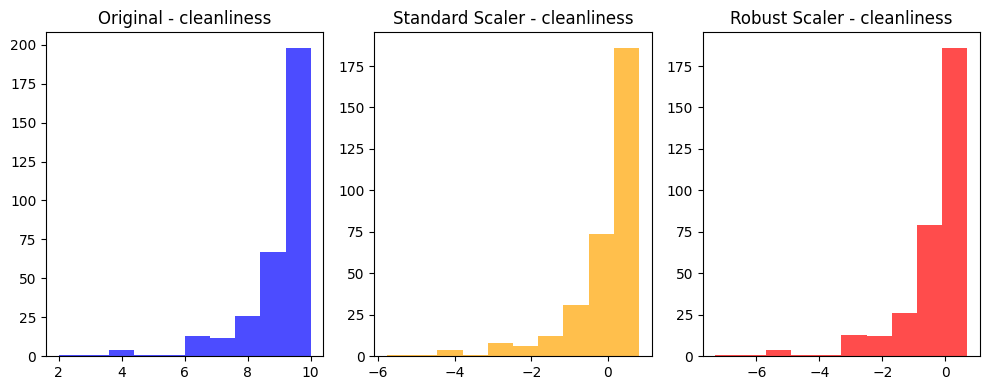

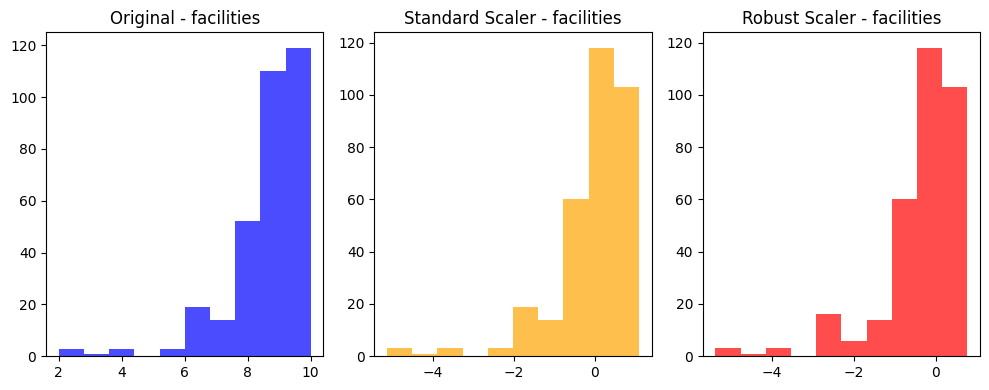

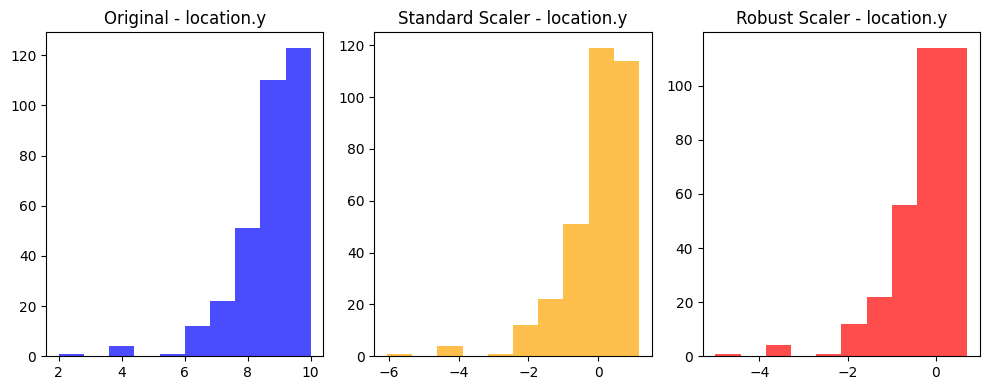

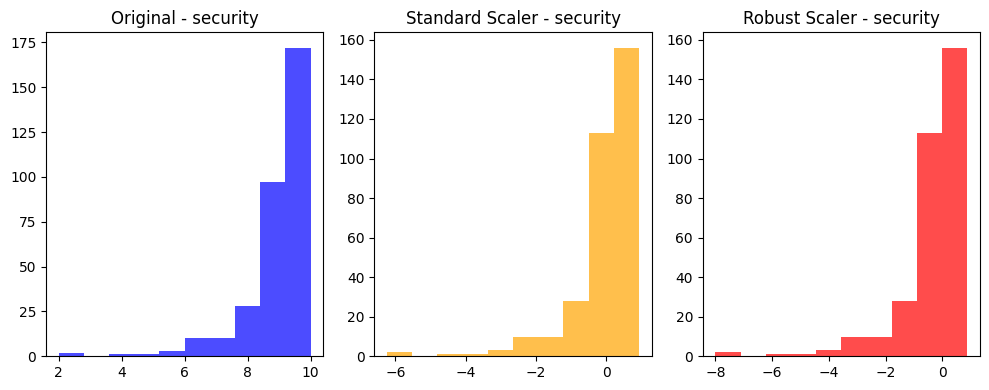

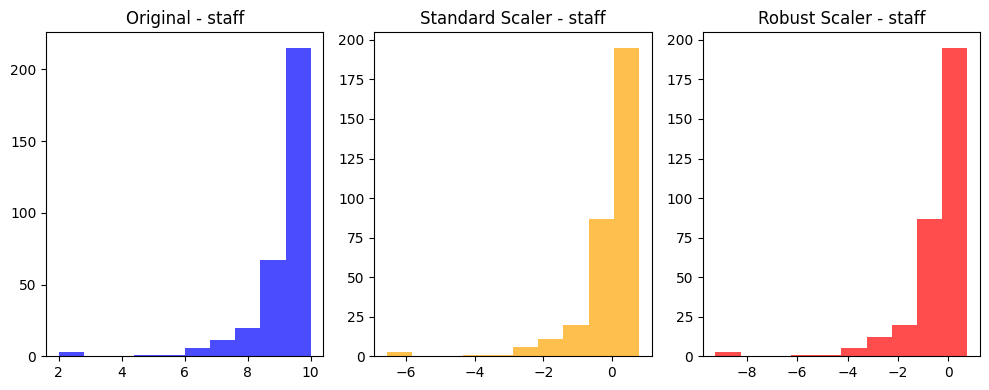

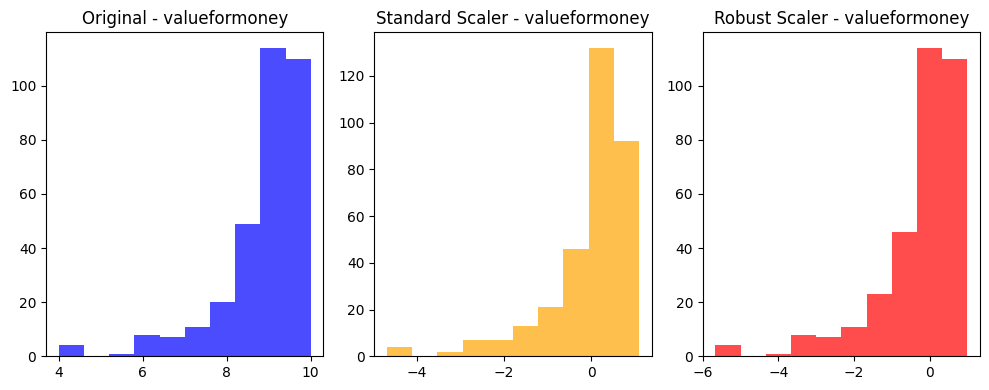

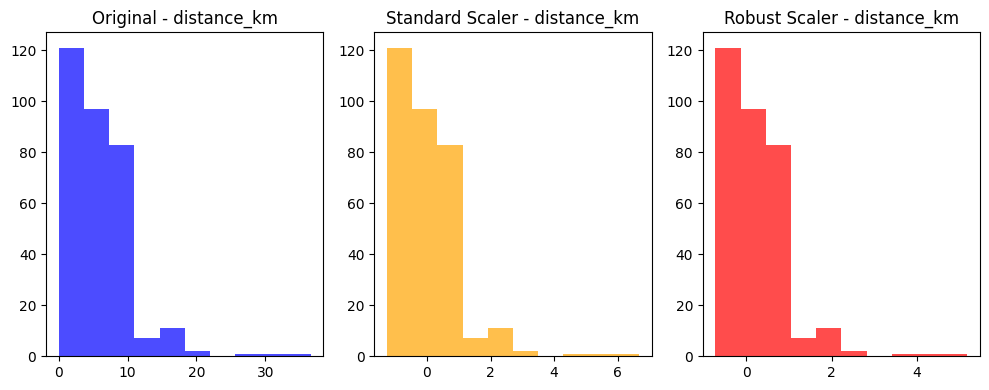

In [62]:
# Visualization
for feature in num_features:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

    axes[0].hist(processed_df[feature], bins=10, color='blue', alpha=0.7)
    axes[0].set_title(f'Original - {feature}')

    axes[1].hist(ss_df[feature], bins=10, color='orange', alpha=0.7)
    axes[1].set_title(f'Standard Scaler - {feature}')

    axes[2].hist(rs_df[feature], bins=10, color='red', alpha=0.7)
    axes[2].set_title(f'Robust Scaler - {feature}')

    plt.tight_layout()
    plt.show()

In [63]:
# One hot encoding
cat_features = processed_df.select_dtypes(include="object").columns
cat_features.to_list()

['City', 'rating.band']

In [64]:
encoder = OneHotEncoder(handle_unknown='ignore', drop='first')
enc_data = encoder.fit_transform(processed_df[cat_features])

In [65]:
cat_feature_names = encoder.get_feature_names_out(cat_features)
enc_df = pd.DataFrame(enc_data.toarray(), columns=cat_feature_names)
enc_df.head()

,City_Hiroshima,City_Kyoto,City_Osaka,City_Tokyo,rating.band_Good,rating.band_Rating,rating.band_Superb,rating.band_Very Good
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [66]:
# Concatenate the original DataFrame with the new one-hot encoded DataFrame
ndf = pd.concat([processed_df, enc_df], axis=1)
# Drop the original categorical columns
ndf.drop(cat_features, axis=1, inplace=True)

In [67]:
ndf.head()

,price.from,summary.score,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,distance_km,City_Hiroshima,City_Kyoto,City_Osaka,City_Tokyo,rating.band_Good,rating.band_Rating,rating.band_Superb,rating.band_Very Good
0,3300.0,9.2,8.9,9.4,9.3,8.9,9.0,9.4,9.4,2.9,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2600.0,9.5,9.4,9.7,9.5,9.7,9.2,9.7,9.5,0.7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3600.0,8.7,8.0,7.0,9.0,8.0,10.0,10.0,9.0,7.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2600.0,7.4,8.0,7.5,7.5,7.5,7.0,8.0,6.5,8.7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1500.0,9.4,9.5,9.5,9.0,9.0,9.5,10.0,9.5,10.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [68]:
print("Original data shape:", processed_df.shape)
print("After OHE data shape:", ndf.shape)

Original data shape: (324, 12)
After OHE data shape: (341, 18)


##### Observations
- Since the data has outliers we can use the Robust Scaler for the numerical features.
- One-hot encoding adds 6 features to our data.

### Model Training

In [74]:
# Split the data
X = processed_df.drop(columns=['price.from'], axis=1)
y = processed_df['price.from']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("Train data shape:", X_train.shape)
print("Test data shape",X_test.shape)

Train data shape: (259, 11)
Test data shape (65, 11)


In [75]:
# Prepare transformer
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = RobustScaler()
ohe_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ("OneHotEncoder", ohe_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ],
    remainder='drop'
)

In [76]:
# Models and scores
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

scoring = {
    'mae':  make_scorer(mean_absolute_error, greater_is_better=False),
    'r2': make_scorer(r2_score)
}

scoreboard=pd.DataFrame(columns=[
    'Model', 
    'Avg MAE',
    'Avg R2'
])

In [77]:
# Model cross validation
def get_model_cross_val(pipeline, X, y, metrics):
    cv_results = cross_validate(pipeline, X, y, scoring = metrics)
    
    mae_score = -round(cv_results['test_mae'].mean(), 2)
    
    r_squared_score = round(cv_results['test_r2'].mean(), 2)
    
    model_name= pipeline.named_steps['model'].__class__.__name__
        
    data = [(model_name, mae_score, r_squared_score)]
    model_scores = pd.DataFrame(data = data, columns=[
    'Model', 
    'Avg MAE',
    'Avg R2'
])
    
    return model_scores

scoreboard.drop(scoreboard.index,inplace=True)

In [78]:
# Models training 
for model in models.values():
    pipeline = Pipeline([
        ('transformer', preprocessor),
        ('model', model)
    ])
    model_scores = get_model_cross_val(pipeline, X_train, y_train, scoring)
    scoreboard = pd.concat([scoreboard, model_scores], ignore_index=True)

c:\Users\idale\Documents\Data Science\mobile-price-range\.conda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.554e+05, tolerance: 1.455e+04
  model = cd_fast.enet_coordinate_descent(


In [79]:
scoreboard

,Model,Avg MAE,Avg R2
0,LinearRegression,593.77,0.03
1,Lasso,590.49,0.04
2,Ridge,589.74,0.05
3,KNeighborsRegressor,589.54,-0.06
4,RandomForestRegressor,592.82,0.03
5,XGBRegressor,649.81,-0.24
6,CatBoostRegressor,599.35,0.02
7,AdaBoostRegressor,602.08,-0.01


### Model Evaluation

In [81]:
# Cat Boost Regressor
model = CatBoostRegressor(verbose=False, random_state=42)
pipeline = Pipeline([
        ('transformer', preprocessor),
        ('model', model)
    ])

In [82]:
# Train best model 
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)

In [83]:
# Get evaluation results
mae_score = round(mean_absolute_error(y_test, y_pred), 2)
r_squared_score = round(r2_score(y_test, y_pred), 2)

print("MAE:", mae_score)
print("R2:", r_squared_score)

MAE: 396.22
R2: 0.2


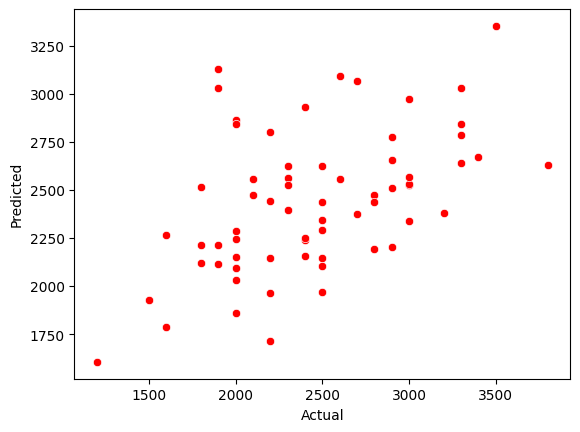

In [84]:
sns.scatterplot(x=y_test,y=y_pred, color ='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [85]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
138,2400,2932.673142,-532.673142
113,3300,3030.652740,269.347260
143,2700,3065.890955,-365.890955
10,1600,2266.670404,-666.670404
189,2300,2563.787424,-263.787424
...,...,...,...
109,2200,1962.951386,237.048614
244,2000,2033.966409,-33.966409
64,1800,2117.846129,-317.846129
99,3300,2638.867961,661.132039


##### Observations
- Given the range of prices, a Mean Absolute Error (MAE) of 599.35 seems ok.
- The low R-squared value (0.02) in the training data indicates that the model explains only 0.2% of the variance. 
- Most probably the model is underfitting.
- During evaluation has pretty better results, with a MAE of 396 and an R-squard of 0.2

### Hyperparameter tuning

In [86]:
param_grid = {
    'model__n_estimators': randint(100, 1000),  # Number of trees
    'model__max_depth': randint(3, 10),          # Depth of trees
    'model__learning_rate': [0.01, 0.05, 0.1],   # Learning rate
    'model__l2_leaf_reg': [0.1, 0.5, 1],         # L2 regularization
    'model__bagging_temperature': [0.5, 1, 2],   # Sampling temperature
    'model__subsample': [0.6, 0.8, 1],           # Portion of training data used
    'model__random_strength': [0.5, 1],          # Random strength for subspace sampling
}

In [87]:
rscv = RandomizedSearchCV(pipeline, param_grid, n_iter=50, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
rscv.fit(X_train, y_train);

In [88]:
print("Best parameters found: ", rscv.best_params_)

Best parameters found:  {'model__bagging_temperature': 1, 'model__l2_leaf_reg': 0.1, 'model__learning_rate': 0.01, 'model__max_depth': 9, 'model__n_estimators': 277, 'model__random_strength': 0.5, 'model__subsample': 0.6}


In [89]:
best_model = rscv.best_estimator_

In [90]:
# Let's see the fine tuned model on evaluation data
y_pred = best_model.predict(X_test)
mae_score = round(mean_absolute_error(y_test, y_pred), 2)
r_squared_score = round(r2_score(y_test, y_pred), 2)

print("MAE:", mae_score)
print("R2:", r_squared_score)

MAE: 391.72
R2: 0.25


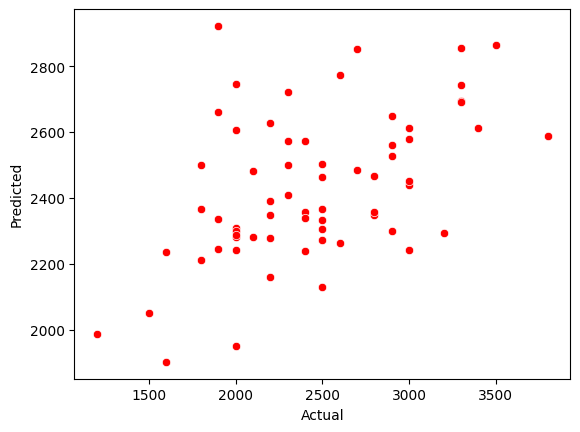

In [91]:
sns.scatterplot(x=y_test,y=y_pred, color ='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [92]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
138,2400,2571.855151,-171.855151
113,3300,2742.523826,557.476174
143,2700,2851.909834,-151.909834
10,1600,2237.363488,-637.363488
189,2300,2573.240090,-273.240090
...,...,...,...
109,2200,2276.989113,-76.989113
244,2000,2298.603366,-298.603366
64,1800,2211.421025,-411.421025
99,3300,2692.720990,607.279010


##### Observations
Tuning the model gave better results but they are still far from good.

### Conclusion
##### Data Insights
Analysis of the hostel data reveals several key insights. Generally, hostel prices range from 1000 to 4000 yen per night, although there are outliers. Notably, higher-priced hostels often boast commendable features such as high ratings and close proximity to city centers. While Tokyo, Kyoto, and Osaka emerge as the cities with the highest concentration of hostels, it's interesting to note that Kyoto tends to offer lower prices compared to its counterparts. Most hostels are situated within 0-20 kilometers from city centers, with exceptions that exceed 25 kilometers. On average, hostels in Tokyo tend to have larger distances. Additionally, there appears to be strong correlations among hostel features, suggesting that each hostel prioritizes maintaining high standards across all aspects. Interestingly, there's a noticeable trend indicating that as the distance from the city center increases, the location score tends to decrease.
##### Model choice
After experimenting with various models, the CatBoostRegressor was ultimately chosen due to slightly improved results. However, it's important to note that the model's performance still falls short of expectations. Despite its selection and a pretty ok MAE of 396 within a price range of 1000 to 4000 (with some outliers exceeding 6000), the significantly low R-squared value of 0.2 during evaluation indicate substantial room for improvement. Following attempts to refine the model using randomsearchcv, some progress was made, with the MAE decreasing to 391 and the R-squared value improving to 0.25 during evaluation. While these adjustments show potential for enhancement, it's evident that further refinement and exploration of alternative strategies are necessary to achieve satisfactory predictive performance.
##### What's Next
- Since the model isn't performing well, getting more data might help. More data can provide better insights and patterns for the model to learn from.
- Introduce new features that might capture important information not currently considered by the model.
- Outliers can skew the model's understanding of the data. Consider identifying and removing outliers, especially in features where they may have a significant impact on the model's performance.